In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
train_orig = pd.read_csv('../input/train.csv')
test_orig = pd.read_csv('../input/test.csv')

In [3]:
train_data = train_orig.drop(columns = ["label"], axis = 1)
train_data = 1.0*train_data / 255 # normalization
train_label = train_orig["label"]
# X_train, X_val, Y_train, Y_val = train_test_split(train_data, train_label, test_size = 0.1, random_state = 2)
test_data = 1.0*test_orig / 255

In [4]:
train_label[0]

1

In [5]:
train_data = train_data.values.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = "relu", input_shape = (28,28,1), padding = "same"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(rate = 0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation = "relu", padding = "same"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(rate = 0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dropout(rate = 0.25),
    tf.keras.layers.Dense(10, activation = "softmax")
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
__________

In [8]:
model.compile(optimizer='adam', loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [9]:
history = model.fit(train_data, train_label, batch_size = 64, epochs = 100, validation_split = 0.1, verbose = 1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/100
37800/37800 [==============================] - 7s 179us/sample - loss: 0.2115 - acc: 0.9338 - val_loss: 0.0532 - val_acc: 0.9826
Epoch 2/100
37800/37800 [==============================] - 4s 102us/sample - loss: 0.0649 - acc: 0.9795 - val_loss: 0.0500 - val_acc: 0.9821
Epoch 3/100
37800/37800 [==============================] - 4s 102us/sample - loss: 0.0450 - acc: 0.9860 - val_loss: 0.0439 - val_acc: 0.9840
Epoch 4/100
37800/37800 [==============================] - 4s 102us/sample - loss: 0.0364 - acc: 0.9885 - val_loss: 0.0289 - val_acc: 0.9895
Epoch 5/100
37800/37800 [==============================] - 4s 102us/sample - loss: 0.0310 - acc: 0.9890 - val_loss: 0.0334 - val_acc: 0.9895
Epoch 6/100
37800/37800 [==============================] - 4s 102us/sample - loss: 0.0255 - acc: 0.9917 - val_loss: 0.0403 - val_acc: 0.9869
Epoch 7/100
37800/37800 [==============================] - 4s 102us/sample - loss: 0.0239 - acc: 0.9920 -

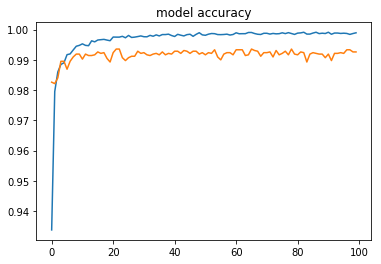

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("model accuracy")
plt.show()

In [11]:
predict = model.predict(test_data)

In [12]:
predict = np.argmax(predict, axis = 1)

In [13]:
submission = pd.concat([pd.Series(range(1 ,28001) ,name = "ImageId"), pd.Series(predict, name="Label")],axis = 1)

In [14]:
submission.to_csv('submission.csv', index=False)

In [15]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
